**Retiro del 10% de Fondo de Pensiones Chileno**

**1. Descripción de la base de datos**

La siguiente descripción corresponde a la publicada por la Superintendencia de Pensiones:

La base a estudiar corresponden a una muestra del 10% de una de las bases que generan los resultados del estudio “Estudio sobre tasas de reemplazo en el sistema de pensiones chileno y sus proyecciones bajo distintos escenarios” publicada por la Superintendencia de Pensiones.
La muestra corresponde a un 10% de afilados activos que, habiendo cumplido la edad legal de pensión entre junio de 2020 y diciembre de 2022, no se habian pensionado a diciembre de 2022 y realizaron todos o alguno de los “retiros del 10% de fondo de pensiones” . Para esta muestra se reporta el registro histórico previsional desde abril de 2007 en adelante.

•	Los datos de cada registro se encuentran delimitados por “;”.



Los datos para el Análisis Exploratorio fueron tomados de:

https://www.spensiones.cl/apps/bdp/downloadBDP.php

Descripción de Archivos

 Información individual de afiliados que, habiendo cumplido edad legal de pensión entre junio de 2020 y diciembre de 2022, no se han pensionado a esta última fecha y realizaron todos o alguno de los “retiros del 10% de fondo de pensiones”.



Las variables que conforman el dataset son:


1.**correl**: 	Identificador
2.**sexo**:   	Sexo
3.**agno_nac**:Año de nacimiento
4.**mes_nac**: Mes de nacimiento
5.** edad:** 	 Edad
6.**saldo_202212**: Saldo total en la CCICO, a diciembre del 2022
7.**monto_retiros**: Monto total de los Retiros
8.**porct_saldo_r1**: % del monto retirado desde CCICO, primer retiro
9.**porct_saldo_r2**:	% del monto retirado desde CCICO, segundo retiro
10.**porct_saldo_r3**: % del monto retirado desde CCICO, tercer retiro
11.**cat_r1_r2_r3**: Retiros realizados 	1 "Solo R1" 2 "Solo R2" 3 "Solo R3" 4 "R1 y R2" 5 "R1 y R3" 6 "R2 y R3" 7 "R1, R2 y R3"
12.**retira_100:** Indica si retira el 100% del saldo en algún retiro a
13.**ind_cumple**:	Indicador, si cumplían con la edad de pensionarse entre junio 2020 y diciembre del 2022 	1: Si cumplían con la edad después de junio 2020 0: Cumplían con la edad antes de junio 2022
14.**monto_retiros_cero_ind**:Indicador si el monto del retiro es igual a 0
15.**saldo_202212_cero_ind**:Indicador si el Saldo total a diciembre del 2022 en la CCICO es igual a 0
16.**region:**	Número de la región de Chile 	Valor 99 indica que no existe información de la región del domicilio.


**2. Cargar el Dataset**

Previamente, descargamos el dataset desde el enlace compartido en la parte superior. Luego, ejecutamos las siguientes líneas de código, para cargar el dataset.

In [1]:
from google.colab import files

uploaded = files.upload()

Saving retiros_no_pensionados1.csv to retiros_no_pensionados1.csv


**3. Lectura del Dataset**

Una vez cargado el dataset, se procede a la lectura del archivo tomando en cuenta el formato en el que se encuentra almacenado.

In [2]:
#Importar librerías
import pandas as pd # Librería para la manipulación y análisis de datos (tablas, CSV, Excel, SQL, entre otros.)
import numpy as np # Librería para el cálculo numérico eficiente y manejo de arreglos/matrices

# Cargar dataset
#Para archivos almacenados en formato CSV: pd.read_csv
#df objeto del tipo DataFrame
df = pd.read_csv("retiros_no_pensionados1.csv", sep=";", encoding="latin-1")
df
columnas_a_transformar = ['saldo_202212','monto_retiros']
df[columnas_a_transformar] = df[columnas_a_transformar] / 1000 #Montos en miles de $
#df
def transformar_cat(valor):
    mapping = {
        1: "R1",
        2: "R2",
        3: "R3",
        4: "R1;R2",
        5: "R1;R3",
        6: "R2;R3",
        7: "R1;R2;R3"
    }
    return mapping.get(valor, None)

df["Etiqueta_R"] = df["cat_r1_r2_r3"].apply(transformar_cat)
df
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32523 entries, 0 to 32522
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   correl                  32523 non-null  int64  
 1   sexo                    32523 non-null  object 
 2   agno_nac                32523 non-null  int64  
 3   mes_nac                 32523 non-null  int64  
 4   edad                    32523 non-null  int64  
 5   saldo_202212            32523 non-null  float64
 6   monto_retiros           32523 non-null  float64
 7   porct_saldo_r1          31222 non-null  float64
 8   porct_saldo_r2          21639 non-null  float64
 9   porct_saldo_r3          19544 non-null  float64
 10  cat_r1_r2_r3            32523 non-null  int64  
 11  retira_100              32523 non-null  int64  
 12  ind_cumple              32523 non-null  int64  
 13  monto_retiros_cero_ind  32523 non-null  int64  
 14  saldo_202212_cero_ind   32523 non-null

,correl,agno_nac,mes_nac,edad,saldo_202212,monto_retiros,porct_saldo_r1,porct_saldo_r2,porct_saldo_r3,cat_r1_r2_r3,retira_100,ind_cumple,monto_retiros_cero_ind,saldo_202212_cero_ind,region
count,3.252300e+04,32523.000000,32523.000000,32523.000000,32523.000000,32523.000000,31222.000000,21639.000000,19544.000000,32523.000000,32523.000000,32523.000000,32523.0,32523.000000,32523.000000
mean,1.088624e+07,1957.911294,7.082126,64.088706,24854.552163,5371.847616,43.108065,33.835066,30.779370,4.794853,0.422009,0.589767,0.0,0.347139,10.385481
std,2.000248e+07,4.390938,3.433752,4.390938,48812.066737,5422.819619,39.635439,35.579533,35.240496,2.587746,0.493888,0.491883,0.0,0.476068,8.765895
min,3.525000e+03,1884.000000,1.000000,60.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000
25%,2.091223e+06,1956.000000,4.000000,61.000000,0.000000,1100.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000,0.0,0.000000,6.000000
50%,3.994173e+06,1959.000000,7.000000,63.000000,1600.000000,3800.000000,22.000000,10.000000,10.000000,7.000000,0.000000,1.000000,0.0,0.000000,11.000000
75%,6.633020e+06,1961.000000,10.000000,66.000000,26700.000000,8500.000000,100.000000,56.000000,43.000000,7.000000,1.000000,1.000000,0.0,1.000000,13.000000
max,9.405476e+07,1962.000000,12.000000,138.000000,668000.000000,16600.000000,100.000000,100.000000,100.000000,7.000000,1.000000,1.000000,0.0,1.000000,99.000000


El dataset está conformado por 32523 filas y 16 columnas.

**4. Análisis Inicial de Datos (IDA)**

Antes de iniciar el análisis detallado, es fundamental examinar la calidad de los datos. Para ello, se revisa la presencia de valores nulos o faltantes, ya que pueden afectar la consistencia y validez de los resultados. Así como, la existencia de valores atípicos y, los tipos de datos asociados a cada una de las variables objeto de estudio.

**4.1. Detección y tratamiento de valores faltantes o erróneos**

 Valores faltantes - Variables numéricas:
correl                        0
agno_nac                      0
mes_nac                       0
edad                          0
saldo_202212                  0
monto_retiros                 0
porct_saldo_r1             1301
porct_saldo_r2            10884
porct_saldo_r3            12979
monto_retiros_cero_ind        0
saldo_202212_cero_ind         0
dtype: int64

 Valores faltantes - Variables categóricas:
sexo            0
cat_r1_r2_r3    0
retira_100      0
ind_cumple      0
region          0
Etiqueta_R      0
dtype: int64


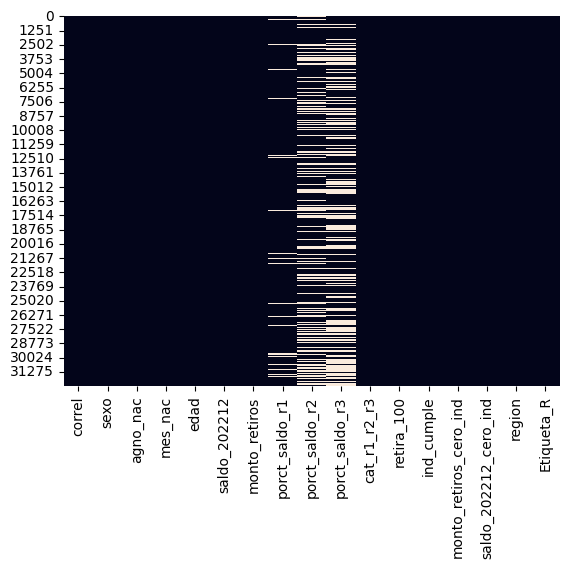

In [ ]:
#Importar librerías
import pandas as pd # Librería para la manipulación y análisis de datos (tablas, CSV, Excel, SQL, entre otros.)
import numpy as np # Librería para el cálculo numérico eficiente y manejo de arreglos/matrices
import seaborn as sns # Librería para la visualización estadística de datos (gráficos más atractivos y de fácil interpretación).
import matplotlib.pyplot as plt # # Librería para la creación de gráficos y visualizaciones en 2D, base sobre la que se apoyan otras librerías, como seaborn.

#1. Detección
#Creamos dos listas, una con las variables númericas y otra, con las categóricas
numericas = ['correl', 'agno_nac', 'mes_nac','edad','saldo_202212','monto_retiros',
            'porct_saldo_r1','porct_saldo_r2','porct_saldo_r3',
             'monto_retiros_cero_ind','saldo_202212_cero_ind']
categóricas = ['sexo', 'cat_r1_r2_r3', 'retira_100', 'ind_cumple', 'region','Etiqueta_R']

# df.isnull() devuelve un DataFrame con True/False según haya nulos
# df.isnul().sum() devuelve el conteo de nulos por columna
print(" Valores faltantes - Variables numéricas:")
print(df[numericas].isnull().sum())

print("\n Valores faltantes - Variables categóricas:")
print(df[categóricas].isnull().sum())

#2. Visualización
#Una vez identificados los valores nulos
#Procedemos a visualizarlos


sns.heatmap(df.isnull(), cbar=False) # Graficamos un mapa de calor (heatmap) para visualizar nulos
plt.show() # Permite mostrar el gráfico



En el gráfico se observa que las variables 'porct_saldo_r1','porct_saldo_r2','porct_saldo_r3'presentan valores nulos. No obstante, en la descripción del dataset se indica que dichas variables incluyen la categoría " ", la cual representa la ausencia de informacion en cuanto al % de retiro efectuado por los cotizantes. Por lo tanto, dichos registros no deben considerarse valores nulos, sino categorías válidas dentro de estas variables.

**4.2. Detección y tratamiento de valores atípicos (outliers)**

**Variables numéricas**

agno_nac: 1286 valores atípicos detectados.
Valores atípicos de 'agno_nac' imputados con la mediana: 1959.0

edad: 1286 valores atípicos detectados.
Valores atípicos de 'edad' imputados con la mediana: 63.0

monto_retiros: 0 valores atípicos detectados.
Valores atípicos de 'monto_retiros' imputados con la mediana: 3800.0

saldo_202212: 4096 valores atípicos detectados.
Valores atípicos de 'saldo_202212' imputados con la mediana: 400.0



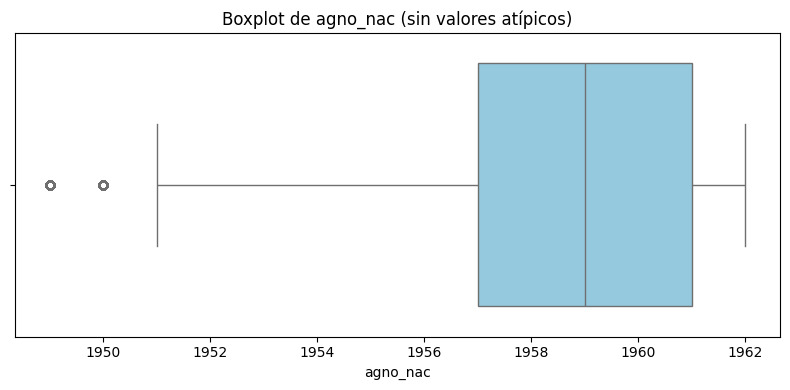

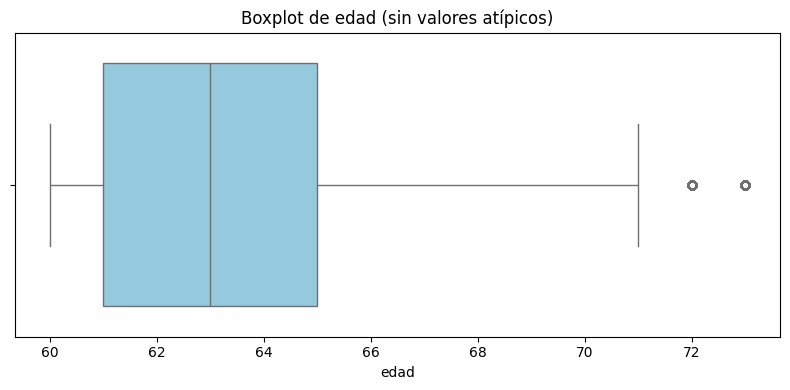

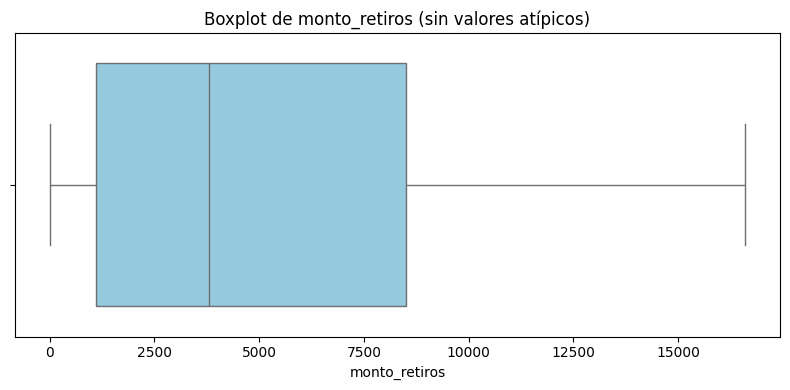

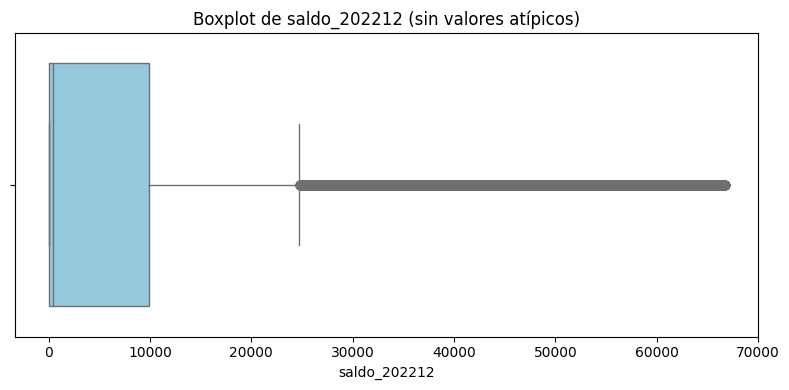

In [ ]:
#Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarse de que los nombres de columnas estén limpios
df.columns = df.columns.str.strip()

# Variables numéricas a analizar

numericas = ['agno_nac', 'edad','monto_retiros','saldo_202212'
            ]

# Función para detectar e imputar valores atípicos usando la mediana
# Cuando se tienen valores atípicos, es aconsejable imputar por la mediana
# ya que, los valores atípicos afectan a la media

#def significa que se creará una función definida por el usuario
#Creamos una función llamada imputar_outliers_con_mediana y le pasamos como argumentos
#el DataFrame (df) y las columnas (col)
def imputar_outliers_con_mediana(df, col):
    df_copy = df.copy() #Hacemos una copia del dataset

    # Calcular límites inferior y superior para obtener el rango intercuartílico (IQR)
    Q1 = df[col].quantile(0.25) # Cálculo del cuartil 1
    Q3 = df[col].quantile(0.75) # Cálculo del cuartil 2
    IQR = Q3 - Q1 # Cálculo del rango intercuartílico
    lim_inf = Q1 - 1.5 * IQR # Límite inferior - valores por debajo se consideran atípicos
    lim_sup = Q3 + 1.5 * IQR # Límite superior -  valores por encima se consideran atípicos

    # Identificar outliers
    outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)]
    print(f"{col}: {len(outliers)} valores atípicos detectados.")

    # Calcular mediana sin outliers
    mediana = df[(df[col] >= lim_inf) & (df[col] <= lim_sup)][col].median()

    # Imputar con la mediana
    df_copy[col] = df_copy[col].apply(lambda x: mediana if x < lim_inf or x > lim_sup else x)
    print(f"Valores atípicos de '{col}' imputados con la mediana: {mediana}\n")

    return df_copy

# Aplicar la función a cada variable numérica
for col in numericas: # Recorremos la lista de variables numéricas usando for
    df = imputar_outliers_con_mediana(df, col)

# Boxplots actualizados
for col in numericas:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot de {col} (sin valores atípicos)')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

**Variables categóricas**

In [ ]:
# df.select_dtypes(include='category'): Seleccionamos todas las columnas del DataFrame df cuyo tipo de dato sea category.
# .columns(): obtiene los nombres de esas columnas.
# .tolist(): convierte ese índice de columnas en una lista de Python.
# cat_cols: guarda la lista con los nombres de todas las columnas categóricas.
cat_cols = df.select_dtypes(include='category').columns.tolist()

for col in cat_cols:
    # Limpiar espacios y estandarizar mayúsculas/minúsculas
    df[col] = df[col].astype(str).str.strip().str.title()


**4.3 Reajuste de los tipos de variables**

Verificamos, si cada una de las variables tiene el tipo de dato correcto.

In [ ]:
print(df.dtypes)

correl                      int64
sexo                       object
agno_nac                  float64
mes_nac                     int64
edad                      float64
saldo_202212              float64
monto_retiros             float64
porct_saldo_r1            float64
porct_saldo_r2            float64
porct_saldo_r3            float64
cat_r1_r2_r3                int64
retira_100                  int64
ind_cumple                  int64
monto_retiros_cero_ind      int64
saldo_202212_cero_ind       int64
region                      int64
Etiqueta_R                 object
dtype: object


En caso contrario, procedemos a realizar la conversión del tipo de dato.

In [ ]:
# importar la clase CategoricalDtype desde pandas.api.types
# permite definir tipos de datos categóricos personalizados en pandas.

from pandas.api.types import CategoricalDtype
# ['sexo', 'cat_r1_r2_r3', 'retira_100', 'ind_cumple', 'region','Etiqueta_R']
# Mantener nombres originales y trazabilidad
variables_categoricas = ['sexo', 'cat_r1_r2_r3', 'retira_100', 'ind_cumple', 'region','Etiqueta_R']

# Conversión explícita a tipo 'category'
df[variables_categoricas] = df[variables_categoricas].astype('category')

# Verificación rápida
df[variables_categoricas].dtypes

#1. Convertir columnas tipo object a category
#Buscar todas las columnas tipo objeto y convertir en una lista
cols_object = df.select_dtypes(include='object').columns.tolist()
for col in cols_object:
    df[col] = df[col].astype('category')

print(df.dtypes)

# Definir orden común: de 1 a 7
orden_1_a_7 = [1, 2, 3, 4, 5,6,7]
# Crear tipo categórico ordenado
ordinal_1_7 = CategoricalDtype(categories=orden_1_a_7, ordered=True)
# Aplicar conversión
df['cat_r1_r2_r3'] = df['cat_r1_r2_r3'].astype(ordinal_1_7)


correl                       int64
sexo                      category
agno_nac                   float64
mes_nac                      int64
edad                       float64
saldo_202212               float64
monto_retiros              float64
porct_saldo_r1             float64
porct_saldo_r2             float64
porct_saldo_r3             float64
cat_r1_r2_r3              category
retira_100                category
ind_cumple                category
monto_retiros_cero_ind       int64
saldo_202212_cero_ind        int64
region                    category
Etiqueta_R                category
dtype: object


**5. Análisis Exploratorio de Datos (EDA)**

En este apartado, se presenta el análisis descriptivo univariado, tanto para las variables numéricas como categóricas y, finalmente, se realiza un análisis multivariado.

**5.1. Análisis Descriptivo**

**5.1.1. Univariado**

**Variables numéricas**


 Análisis descriptivo numérico: agno_nac
       agno_nac      edad  monto_retiros  saldo_202212
count  32523.00  32523.00       32523.00      32523.00
mean    1958.53     63.47        5371.85       8286.39
std        3.12      3.12        5422.82      14981.96
min     1949.00     60.00           0.00          0.00
25%     1957.00     61.00        1100.00          0.00
50%     1959.00     63.00        3800.00        400.00
75%     1961.00     65.00        8500.00       9900.00
max     1962.00     73.00       16600.00      66700.00
Asimetría: -0.86
Curtosis: 0.12


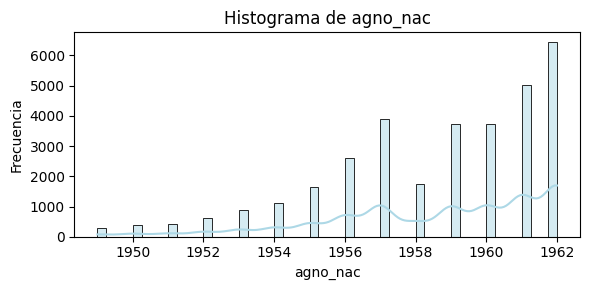

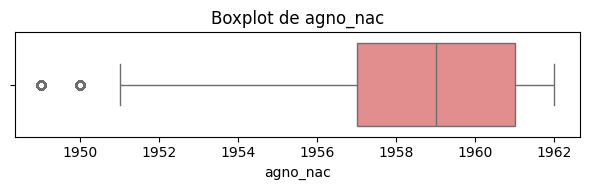


 Análisis descriptivo numérico: edad
       agno_nac      edad  monto_retiros  saldo_202212
count  32523.00  32523.00       32523.00      32523.00
mean    1958.53     63.47        5371.85       8286.39
std        3.12      3.12        5422.82      14981.96
min     1949.00     60.00           0.00          0.00
25%     1957.00     61.00        1100.00          0.00
50%     1959.00     63.00        3800.00        400.00
75%     1961.00     65.00        8500.00       9900.00
max     1962.00     73.00       16600.00      66700.00
Asimetría: 0.86
Curtosis: 0.12


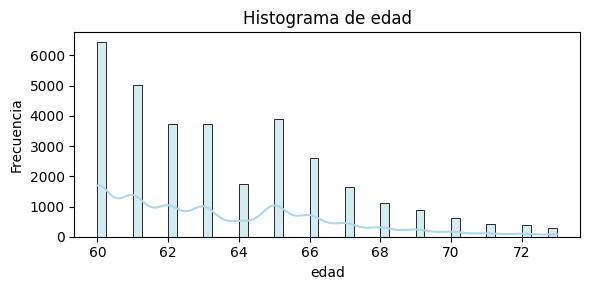

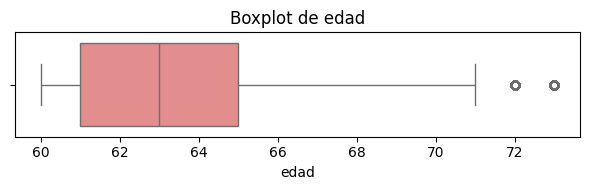


 Análisis descriptivo numérico: monto_retiros
       agno_nac      edad  monto_retiros  saldo_202212
count  32523.00  32523.00       32523.00      32523.00
mean    1958.53     63.47        5371.85       8286.39
std        3.12      3.12        5422.82      14981.96
min     1949.00     60.00           0.00          0.00
25%     1957.00     61.00        1100.00          0.00
50%     1959.00     63.00        3800.00        400.00
75%     1961.00     65.00        8500.00       9900.00
max     1962.00     73.00       16600.00      66700.00
Asimetría: 1.02
Curtosis: -0.36


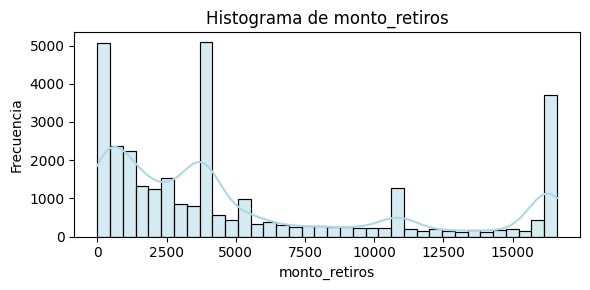

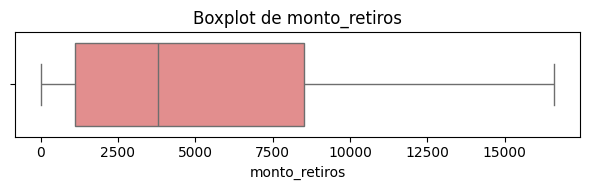


 Análisis descriptivo numérico: saldo_202212
       agno_nac      edad  monto_retiros  saldo_202212
count  32523.00  32523.00       32523.00      32523.00
mean    1958.53     63.47        5371.85       8286.39
std        3.12      3.12        5422.82      14981.96
min     1949.00     60.00           0.00          0.00
25%     1957.00     61.00        1100.00          0.00
50%     1959.00     63.00        3800.00        400.00
75%     1961.00     65.00        8500.00       9900.00
max     1962.00     73.00       16600.00      66700.00
Asimetría: 2.07
Curtosis: 3.49


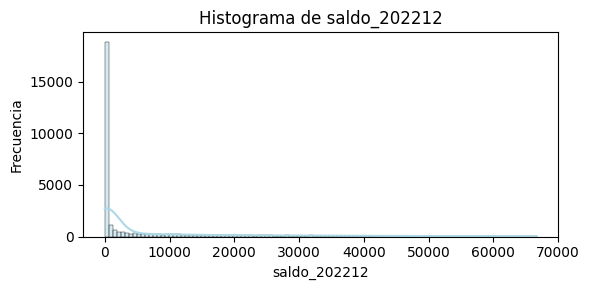

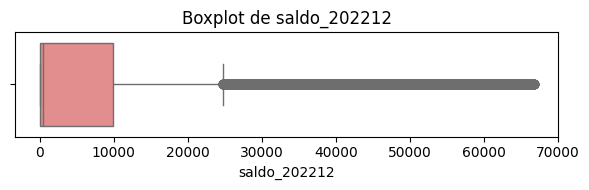

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numericas = ['agno_nac', 'edad','monto_retiros','saldo_202212'
            ]
for col in numericas:
    print(f"\n Análisis descriptivo numérico: {col}")
    print(df[numericas].describe().round(2))
    print(f"Asimetría: {df[col].skew():.2f}")
    print(f"Curtosis: {df[col].kurtosis():.2f}")

    # Histograma + KDE
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, color='lightblue')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

**Variables categóricas**


 Análisis descriptivo categórico: Etiqueta_R
Etiqueta_R
R1;R2;R3    17150
R1           8807
R1;R2        3830
R1;R3        1451
R3            625
R2            331
R2;R3         329
Name: count, dtype: int64


/tmp/ipython-input-3004254916.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


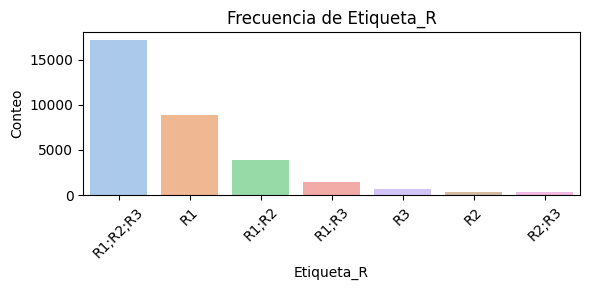


 Análisis descriptivo categórico: sexo
sexo
F    23857
M     8666
Name: count, dtype: int64


/tmp/ipython-input-3004254916.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


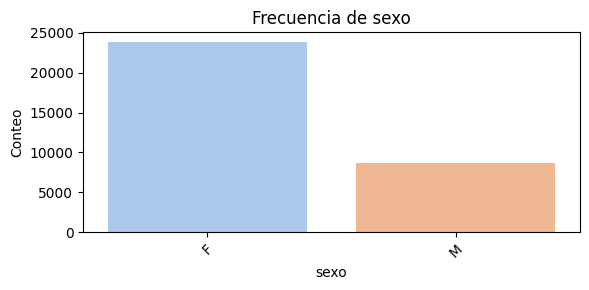


 Análisis descriptivo categórico: region
region
13    13605
5      3629
8      2649
7      1876
6      1685
9      1602
10     1448
4      1192
2      1011
16      850
14      650
3       600
1       506
15      402
12      337
99      253
11      228
Name: count, dtype: int64


/tmp/ipython-input-3004254916.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


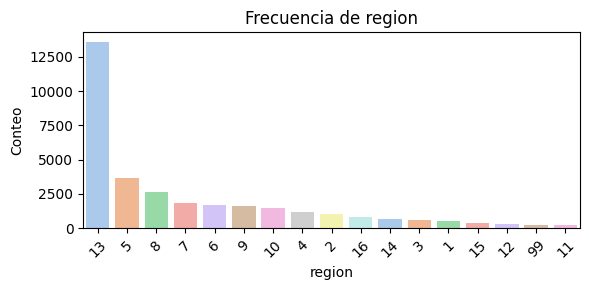


 Análisis descriptivo categórico: retira_100
retira_100
0    18798
1    13725
Name: count, dtype: int64


/tmp/ipython-input-3004254916.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='pastel')


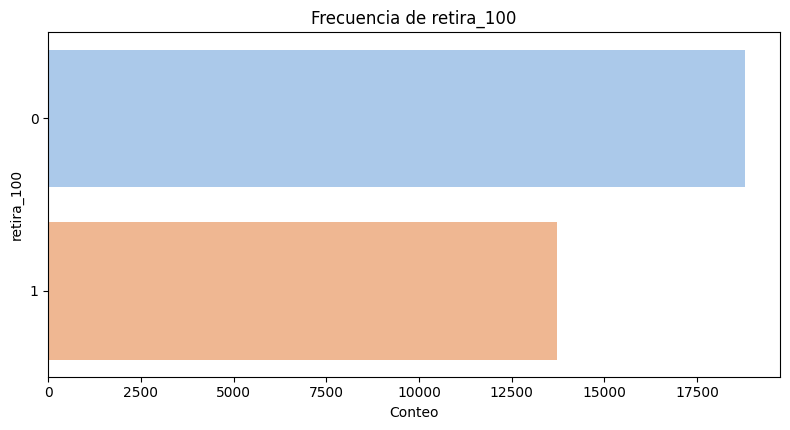


 Análisis descriptivo categórico: ind_cumple
ind_cumple
1    19181
0    13342
Name: count, dtype: int64


/tmp/ipython-input-3004254916.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='pastel')


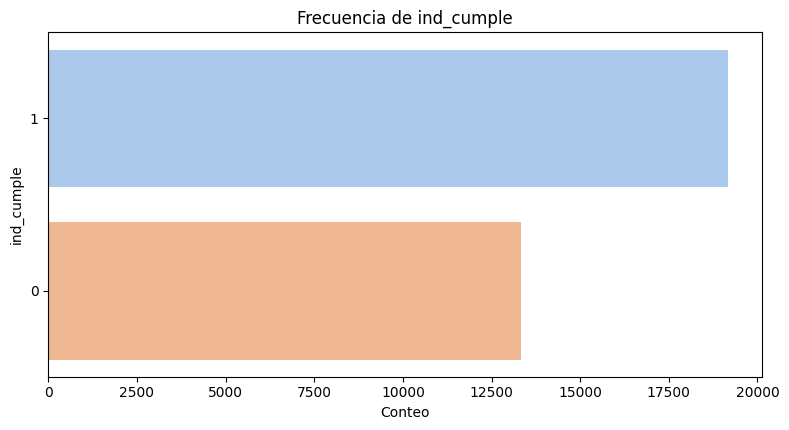

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#variables_categoricas = ['sexo', 'cat_r1_r2_r3', 'retira_100', 'ind_cumple', 'region']

# Análisis de variables categóricas
categoricas_horizontales = ['retira_100', 'ind_cumple']
categoricas_verticales = ['Etiqueta_R', 'sexo', 'region']

# Gráficos de barras verticales
for col in categoricas_verticales:
    print(f"\n Análisis descriptivo categórico: {col}")
    print(df[col].value_counts())

    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
    plt.title(f'Frecuencia de {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Gráficos de barras horizontales
for col in categoricas_horizontales:
    print(f"\n Análisis descriptivo categórico: {col}")
    print(df[col].value_counts())

    plt.figure(figsize=(8, 4 + len(df[col].unique()) * 0.2))  # Ajuste dinámico del alto
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='pastel')
    plt.title(f'Frecuencia de {col}')
    plt.xlabel('Conteo')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()





**5.1.2. Bivariado (Relacionar variables)**

A continuación, se presentan algunos ejemplos, combinando diferentes tipos de variables:

**numericas** = ['correl', 'agno_nac', 'mes_nac','edad','saldo_202212','monto_retiros',
            'porct_saldo_r1','porct_saldo_r2','porct_saldo_r3',
             'monto_retiros_cero_ind','saldo_202212_cero_ind']
**categóricas** = ['sexo', 'cat_r1_r2_r3', 'retira_100', 'ind_cumple', 'region']


**1. Edad vs Monto_Retiros**


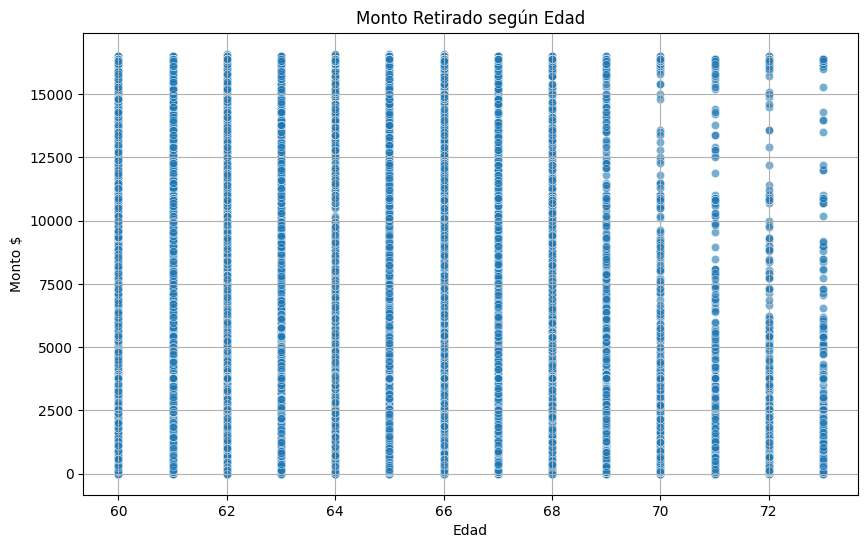

       edad_Group    media  mediana  desviacion    moda  minimo   maximo
0  (59.987, 62.6]  4559.06   3350.0     4853.36  3800.0     0.0  16600.0
1    (62.6, 65.2]  5793.78   3800.0     5762.01  3800.0     0.0  16600.0
2    (65.2, 67.8]  6452.77   3850.0     5826.47  3800.0     0.0  16600.0
3    (67.8, 70.4]  6770.41   4150.0     5861.67  3800.0     0.0  16500.0
4    (70.4, 73.0]  5554.58   3800.0     5394.94  3800.0     0.0  16500.0
  edad_Group    media  mediana  desviacion    moda  minimo   maximo
0      35-39      NaN      NaN         NaN     NaN     NaN      NaN
1      40-44      NaN      NaN         NaN     NaN     NaN      NaN
2      45-49      NaN      NaN         NaN     NaN     NaN      NaN
3      50-54      NaN      NaN         NaN     NaN     NaN      NaN
4      55-59      NaN      NaN         NaN     NaN     NaN      NaN
5      60-65  4622.56   3250.0     5019.46  3800.0     0.0  16600.0


/tmp/ipython-input-2931206952.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = df.groupby(pd.cut(df['edad'], bins=5))['monto_retiros'].agg(
/tmp/ipython-input-2931206952.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = df.groupby(pd.cut(df['edad'], bins=bins, labels=labels, right=False))['monto_retiros'].agg(


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Gráfico
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x= 'edad', y='monto_retiros', alpha=0.6)
plt.title('Monto Retirado según Edad')
plt.xlabel('Edad')
plt.ylabel('Monto $')
plt.grid(True)
plt.show()

#Grupo de edades automáticamente
resumen = df.groupby(pd.cut(df['edad'], bins=5))['monto_retiros'].agg(
    media='mean',
    mediana='median',
    desviacion='std',
    moda=lambda x: x.mode()[0] if not x.mode().empty else None,
    minimo='min',
    maximo='max'
).reset_index().rename(columns={'edad': 'edad_Group'}).round(2)

print(resumen)

#Definir los grupos de edades
# Definir los bins
bins = [35, 40, 45, 50, 55, 60, 65]  # Ajusta según los rangos que desees

# (Opcional) etiquetas personalizadas para esos bins
labels = ['35-39', '40-44', '45-49', '50-54', '55-59', '60-65']

# Agrupar usando pd.cut con tus bins y etiquetas
resumen = df.groupby(pd.cut(df['edad'], bins=bins, labels=labels, right=False))['monto_retiros'].agg(
    media='mean',
    mediana='median',
    desviacion='std',
    moda=lambda x: x.mode()[0] if not x.mode().empty else None,
    minimo='min',
    maximo='max'
).reset_index().rename(columns={'edad': 'edad_Group'}).round(2)

print(resumen)


**2. Nivel de Retiro vs. Edad**

    edad    media  mediana  desviacion  minimo   maximo
0   60.0  4774.81   3800.0     4824.95     0.0  16500.0
1   61.0  4399.94   3100.0     4771.07     0.0  16500.0
2   62.0  4401.94   2650.0     4996.67     0.0  16600.0
3   63.0  4630.72   2750.0     5304.12     0.0  16500.0
4   64.0  5154.92   2750.0     5732.24     0.0  16600.0
5   65.0  7199.86   5350.0     5897.32     0.0  16600.0
6   66.0  6263.99   3800.0     5795.89     0.0  16600.0
7   67.0  6752.20   3950.0     5863.97     0.0  16500.0
8   68.0  7033.91   4975.0     5841.65     0.0  16500.0
9   69.0  6871.18   4450.0     5941.53     0.0  16500.0
10  70.0  6138.98   3800.0     5744.89     0.0  16500.0
11  71.0  5887.38   3800.0     5647.07     0.0  16400.0
12  72.0  5750.53   3800.0     5348.86     0.0  16500.0
13  73.0  4822.20   3800.0     5023.73     0.0  16400.0


/tmp/ipython-input-1583450488.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='edad', y='monto_retiros', palette='Set2')


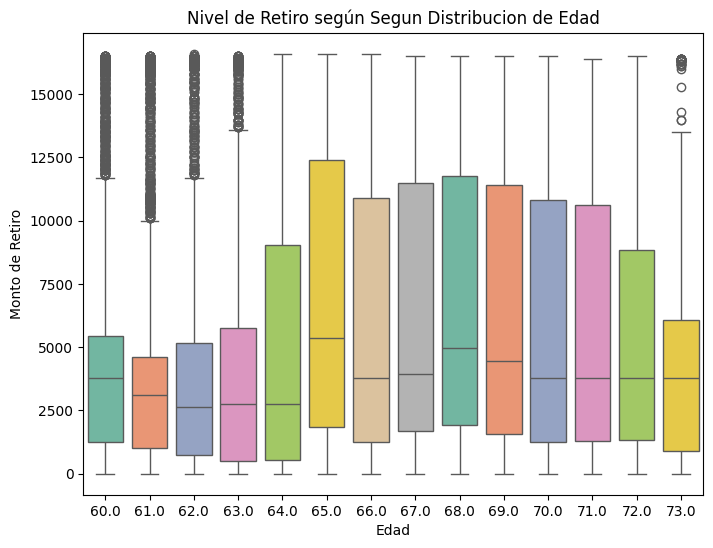

/tmp/ipython-input-1583450488.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='edad', y='monto_retiros', palette='Set3')


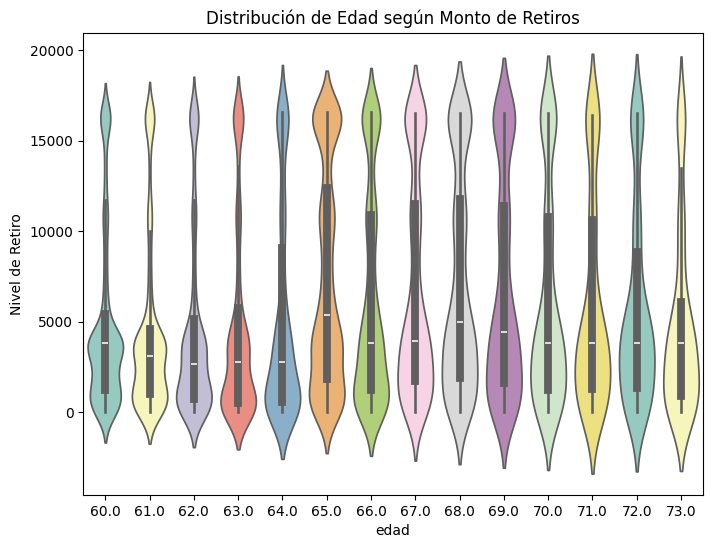

/tmp/ipython-input-1583450488.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(data=df, x='edad', y='monto_retiros', capsize=0.1, join=False, palette='dark')
/tmp/ipython-input-1583450488.py:37: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=df, x='edad', y='monto_retiros', capsize=0.1, join=False, palette='dark')


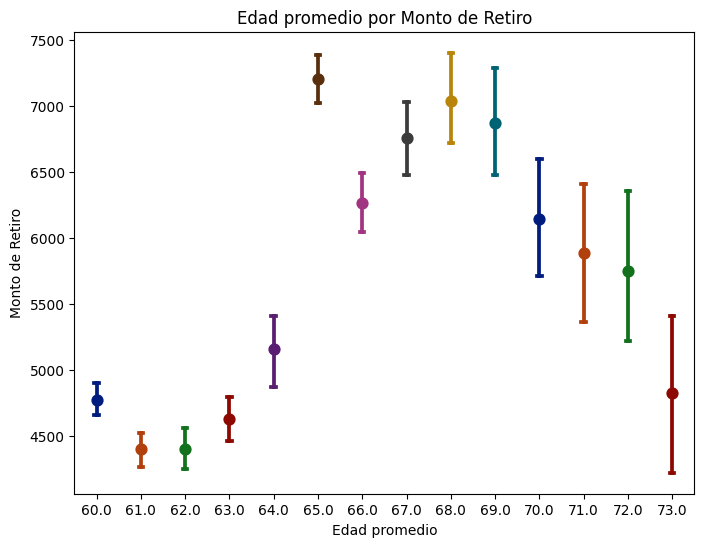

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Agrupando
resumen = df.groupby('edad')['monto_retiros'].agg(
    media='mean',
    mediana='median',
    desviacion='std',
    minimo='min',
    maximo='max'
).reset_index().round(2)

print(resumen)

#Gráfico de cajas
#Muestra la distribución del retiro en cada categoría de edad
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='edad', y='monto_retiros', palette='Set2')

plt.title('Nivel de Retiro según Segun Distribucion de Edad')
plt.xlabel('Edad')
plt.ylabel('Monto de Retiro')
plt.show()


#Gráfico de violín
#Otra forma de visualizar la distribución (muestra la densidad de datos):
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='edad', y='monto_retiros', palette='Set3')
plt.title('Distribución de Edad según Monto de Retiros')
plt.xlabel('edad')
plt.ylabel('Nivel de Retiro')
plt.show()

#Gráfico de puntos con promedio y error (mean ± std)
plt.figure(figsize=(8,6))
sns.pointplot(data=df, x='edad', y='monto_retiros', capsize=0.1, join=False, palette='dark')
plt.title('Edad promedio por Monto de Retiro')
plt.xlabel('Edad promedio')
plt.ylabel('Monto de Retiro')
plt.show()

**3. Region vs. Monto Retiro (Numérica - Categórica Ordinal)**

    region    Media  Mediana  Desviación  Mínimo   Máximo    Moda
0        1  5376.38   3800.0     5409.32     0.0  16600.0  3800.0
1        2  5985.81   3800.0     5688.80     0.0  16500.0  3800.0
2        3  5595.50   3800.0     5626.17     0.0  16500.0  3800.0
3        4  5192.66   3575.0     5412.04     0.0  16500.0  3800.0
4        5  5140.63   3800.0     5188.99     0.0  16500.0  3800.0
5        6  4761.99   3250.0     5112.22     0.0  16500.0  3800.0
6        7  4568.47   2550.0     5285.91     0.0  16500.0  3800.0
7        8  5434.98   3800.0     5563.23     0.0  16500.0  3800.0
8        9  4794.19   3100.0     5278.14     0.0  16600.0  3800.0
9       10  4934.08   3550.0     5260.79     0.0  16500.0  3800.0
10      11  5451.10   3800.0     5606.72     0.0  16500.0  3800.0
11      12  5876.85   3800.0     5709.33     0.0  16500.0  3800.0
12      13  5800.82   3800.0     5494.91     0.0  16600.0  3800.0
13      14  4608.77   2800.0     5134.01     0.0  16500.0  3800.0
14      15

/tmp/ipython-input-2270993020.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='region', y='monto_retiros', palette='pastel')


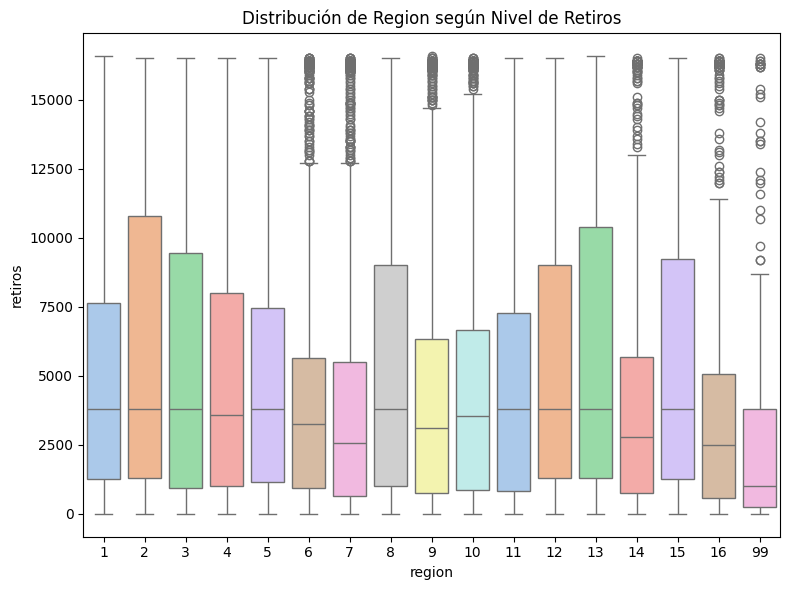

In [ ]:
#Usando groupby
# Resumen estadístico agrupado de la columna Hours_Per_Week según los niveles de Burnout_Level
resumen = df.groupby('region',observed=False)['monto_retiros'].agg(
    Media='mean',
    Mediana='median',
    Desviación='std',
    Mínimo='min',
    Máximo='max',
    Moda=lambda x: x.mode()[0] if not x.mode().empty else None
).reset_index().round(2)

# .reset_index convierte el índice de grupos (Burnout_Level) en una columna normal del DataFrame.
# Redondea todos los valores numéricos a 2 decimales.

print(resumen) # Muestra el resumen por pantalla.

print()

#Usando tabla_pivot
#tabla dinámica (pivot table) en pandas para resumir estadísticamente las horas trabajadas por semana (Hours_Per_Week)
#según el nivel de burnout (Burnout_Level)

tabla_pivot = pd.pivot_table(
    df,
    index='region', # Agrupa los datos según los niveles de burnout
    values='monto_retiros', # Columna sobre la que se calcularán las estadísticas
    #Funciones de agregación aplicadas a cada grupo
    # La función lambda es para la moda Moda (si existe)
    aggfunc=['mean', 'median', 'std', 'min', 'max', lambda x: x.mode()[0] if not x.mode().empty else None],
    observed=False
)
# Renombrar columnas para mejor lectura
tabla_pivot.columns = ['media', 'mediana', 'Desviación', 'Mínimo', 'Máximo', 'Moda']
tabla_pivot = tabla_pivot.round(2).reset_index()
print(tabla_pivot)

#Gráfico
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='region', y='monto_retiros', palette='pastel')
plt.title('Distribución de Region según Nivel de Retiros')
plt.xlabel('region')
plt.ylabel('retiros')
plt.tight_layout()
plt.show()

**4. Saldo_202212 vs. Tipo de Retiro (Numérica - Ordinal)**

  Etiqueta_R     media  mediana  desviacion  minimo   maximo   moda
6         R3   3993.76    200.0    11602.97     0.0  66200.0    0.0
5      R2;R3   7622.19    400.0    14342.62     0.0  66500.0    0.0
4         R2   1509.67      0.0     6275.08     0.0  59700.0    0.0
3      R1;R3   8550.10    400.0    17016.06     0.0  66700.0  400.0
2   R1;R2;R3  13186.40   5200.0    16886.40     0.0  66700.0  400.0
1      R1;R2   3444.93      0.0    10666.16     0.0  66700.0    0.0
0         R1   1390.69      0.0     7089.41     0.0  66400.0    0.0


/tmp/ipython-input-601175679.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Etiqueta_R', y='saldo_202212', palette='coolwarm')


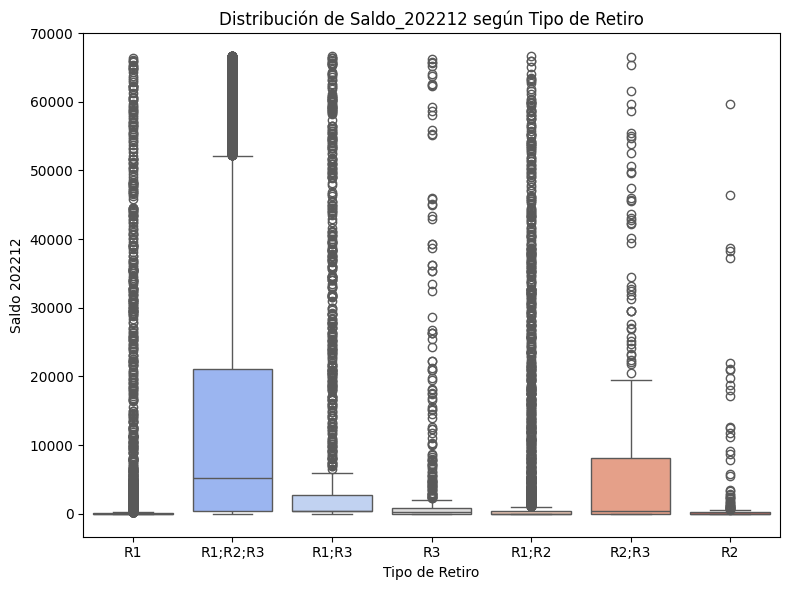

In [ ]:
#Agrupar
resumen = df.groupby('Etiqueta_R')['saldo_202212'].agg(
    media='mean',
    mediana='median',
    desviacion='std',
    minimo='min',
    maximo='max',
    moda=lambda x: x.mode()[0] if not x.mode().empty else None
).reset_index().round(2).sort_values(by=['Etiqueta_R'], ascending=False)

print(resumen)

#Gráfico
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Etiqueta_R', y='saldo_202212', palette='coolwarm')

plt.title('Distribución de Saldo_202212 según Tipo de Retiro')
plt.xlabel('Tipo de Retiro')
plt.ylabel('Saldo 202212')
plt.tight_layout()
plt.show()

**5. Sexo vs. Tipo de Retiro (categórica - categórica (ordinal))**

/tmp/ipython-input-2962813578.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla_pivot = df.pivot_table(


Etiqueta_R     R1  R1;R2  R1;R3  R1_R2_R3    R2  R2;R3    R3
sexo                                                        
F           30.18  12.79   3.97     49.24  0.96   1.00  1.86
M           18.56   8.98   5.82     62.34  1.17   1.05  2.10


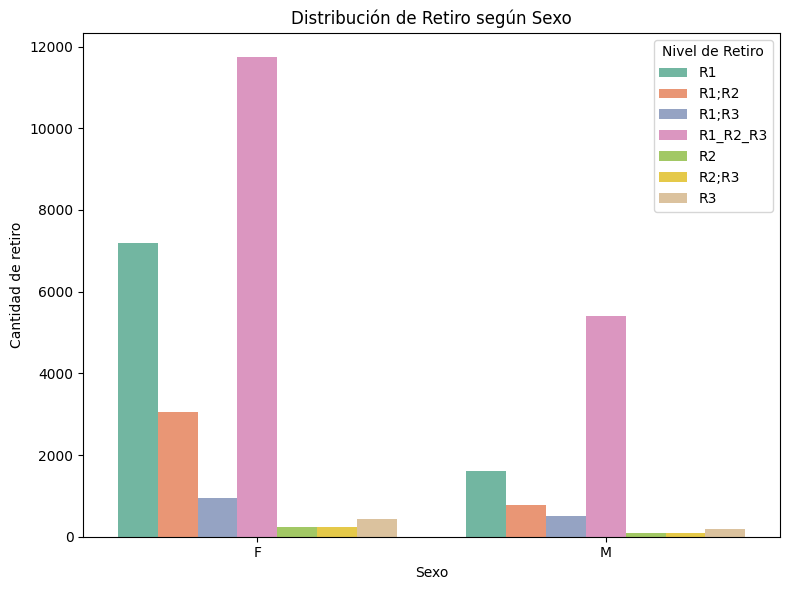

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

tabla_pivot = df.pivot_table(
    index='sexo',
    columns='Etiqueta_R',
    aggfunc='size',
    fill_value=0
)

# Calcular porcentaje por fila (sumar cada fila y dividir cada celda por esa suma)
tabla_porcentaje = tabla_pivot.div(tabla_pivot.sum(axis=1), axis=0) * 100

# Redondear
tabla_porcentaje = tabla_porcentaje.round(2)

print(tabla_porcentaje)

#Gráfico
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='sexo', hue='Etiqueta_R', palette='Set2')
plt.title('Distribución de Retiro según Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de retiro')
plt.legend(title='Nivel de Retiro')
plt.tight_layout()
plt.show()


**5.1 Sexo v/s Retiro_100**

/tmp/ipython-input-3226364046.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Nivel de Retiro')


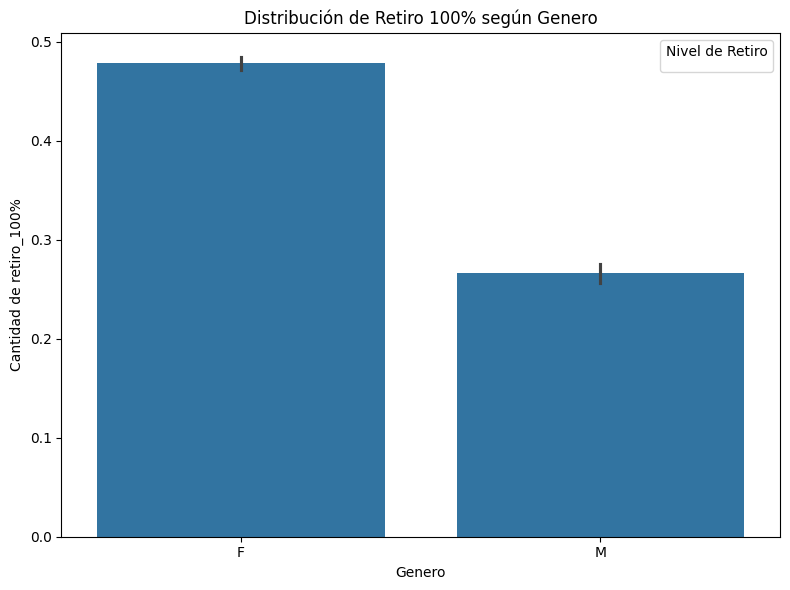

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df.groupby('sexo', observed=True)['retira_100'].count().round(3)



#Gráfico
plt.figure(figsize=(8,6))
sns.barplot(x='sexo', y='retira_100', data=df, estimator=np.mean)
plt.title('Distribución de Retiro 100% según Genero')
plt.xlabel('Genero')
plt.ylabel('Cantidad de retiro_100%')
plt.legend(title='Nivel de Retiro')
plt.tight_layout()
plt.show()

**6. Sexo vs. Region (Categórica - Categórica)**

/tmp/ipython-input-1384525936.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla = df.pivot_table(


region      1      2      3      4       5      6      7      8      9     10  \
sexo                                                                            
F       1.55%  3.12%  1.78%  3.65%  10.99%  5.26%  5.96%   7.9%  4.67%  4.38%   
M       1.57%  3.08%  2.02%  3.72%  11.61%  4.95%  5.23%  8.83%  5.62%  4.65%   

region     11     12      13     14     15     16     99  
sexo                                                      
F       0.61%   1.0%  42.61%  1.94%  1.19%  2.57%  0.81%  
M       0.96%  1.14%   39.7%  2.16%  1.36%  2.72%  0.69%  


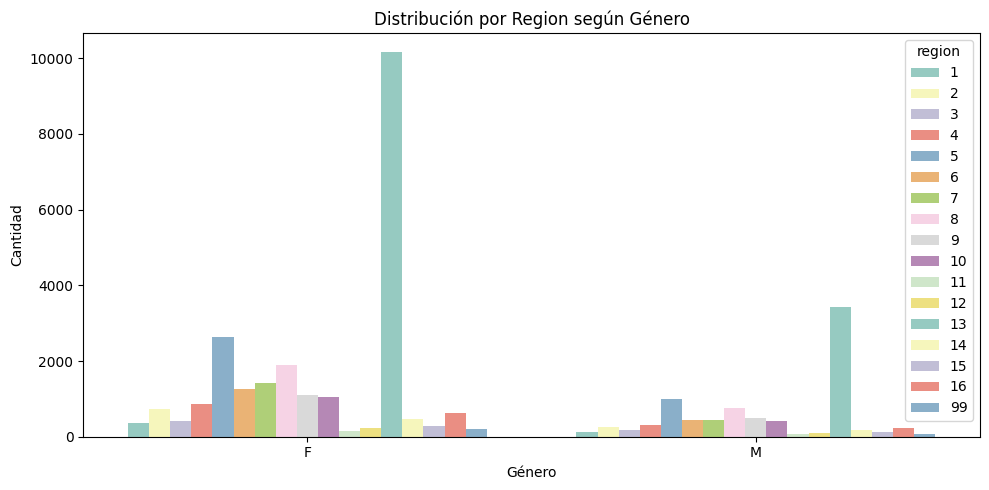

/tmp/ipython-input-1384525936.py:34: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla = df.pivot_table(


<Figure size 800x400 with 0 Axes>

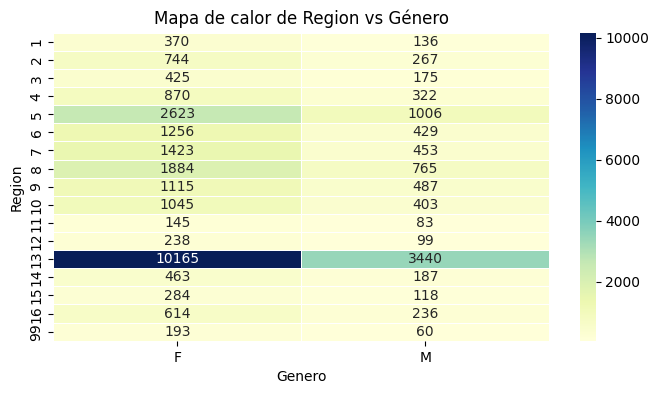

In [ ]:
tabla = df.pivot_table(
    index='sexo',
    columns='region',
    aggfunc='size',
    fill_value=0
)

tabla_pct = tabla.div(tabla.sum(axis=1), axis=0) * 100
tabla_pct = tabla_pct.round(2)

# Convertir a texto con %
tabla_pct_str = tabla_pct.astype(str) + '%'

print(tabla_pct_str)

#Gráfico
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='sexo', hue='region', palette='Set3')
plt.title('Distribución por Region según Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.legend(title='region')
plt.tight_layout()
plt.show()

#Gráfico heatmap
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))  # Aumentar tamaño de figura

props = lambda key: {'fontsize': 12}  # Tamaño de fuente para etiquetas

tabla = df.pivot_table(
    index='region',
    columns='sexo',
    aggfunc='size',
    fill_value=0
)

plt.figure(figsize=(8,4))
#sns.heatmap(tabla, annot=True, fmt='.1f', cmap='YlGnBu')
sns.heatmap(tabla, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, linecolor='white')

plt.title('Mapa de calor de Region vs Género')
plt.xlabel('Genero')
plt.ylabel('Region')
plt.show()

**5.2. Análisis Multivariado**

Finalmente, puede ser útil realizar un análisis multivariado. Esta técnica permite examinar de forma simultánea el comportamiento y la interacción de tres o más variables, con el fin de descubrir patrones complejos, identificar relaciones ocultas y comprender de manera más profunda la estructura interna de los datos.



**1. Impacto de Tipo de Retiros a Nivel Regional**

Impacto por Tipo de retiros a nivel regional.

¿Qué tipo de retiro incide a nivel regional?

edad     60    61    62    63   64   65         66        67   ... 91  92   \
sexo       F     F     F     F    F    F     M    F    M    F  ...   M   F   
region                                                         ...           
1        111    84    51    36   28    7    36   16   27   12  ...   0   0   
2        189   159   108    84   67   36    79   36   59   17  ...   0   0   
3        111    99    65    50   29   19    58   14   41    7  ...   0   0   
4        225   186   158    82   67   50    96   26   63   20  ...   0   0   
5        717   556   403   275  182  121   340   94  174   69  ...   0   0   
6        332   278   206   139   78   55   136   48   78   33  ...   0   0   
7        387   318   223   134   88   70   127   55   96   31  ...   1   0   
8        492   418   318   180  146   75   222   78  152   44  ...   0   0   
9        287   237   181   122   88   63   161   45  106   16  ...   0   0   
10       315   209   151    91   83   52   151   48   86   23  .

<Axes: xlabel='count', ylabel='region'>

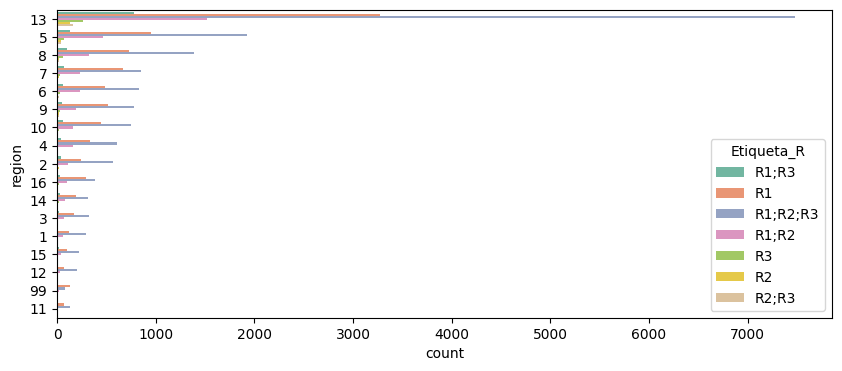

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
df_filtrado = df[df['region'] != 13]
tabla = df.pivot_table(
    index='region',
    columns=['edad', 'sexo'],
    aggfunc='size',
    fill_value=0
)

print(tabla)

#Gráfico dos variables
plt.figure(figsize=(10,4))
sns.countplot(
    data=df,
    y='region',
    hue='Etiqueta_R',
    order=df['region'].value_counts().index,
    palette='Set2'
)


#Gráfico general
# Crear el gráfico con múltiples columnas (una por region)
#g = sns.catplot(
#    data=df,
#    kind='count', #'count',
#    x='region',
#    hue='Etiqueta_R',
#    col='region',
#    col_wrap=3,
#    height=3,        # altura de cada subgráfico
#    aspect=.5,        # relación ancho/alto
#    palette='Set2'
#)

# Ajustar espacio vertical entre filas
#g.fig.subplots_adjust(top=0.9, hspace=0.4)  # hspace controla el espacio vertical

# Título general y rotación de etiquetas
#g.fig.suptitle('Cantidad/Tipo de retiros en cada region')
#g.set_xticklabels(rotation=45)

#plt.show()

**2. Saldo por Tipo de Retiro y Genero**

Comparar cómo afecta el Tipo de Retiro por Genero en el Saldo.

¿Influye el Genero en el saldo segun las veces que se retiro ?

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

resumen = df.groupby(['Etiqueta_R', 'sexo'])['saldo_202212'].agg(
    media='mean',
    mediana='median',
    desviacion='std',
    conteo='count'
).round(2).reset_index()

print(resumen)



   Etiqueta_R sexo      media   mediana  desviacion  conteo
0          R1    F    5653.10       0.0    25952.97    7199
1          R1    M   22506.03       0.0    62531.25    1608
2       R1;R2    F    6433.98       0.0    21741.35    3052
3       R1;R2    M   18714.27       0.0    44650.14     778
4    R1;R2;R3    F   25586.24   10000.0    37318.91   11748
5    R1;R2;R3    M   46773.99   22800.0    61890.56    5402
6       R1;R3    F   61230.52   41600.0    66705.50     947
7       R1;R3    M  127845.04  115500.0   112912.00     504
8          R2    F    4016.52       0.0    19480.45     230
9          R2    M   16294.06       0.0    45629.06     101
10      R2;R3    F   14585.71     500.0    37300.22     238
11      R2;R3    M   37707.69    7200.0    61433.52      91
12         R3    F   12228.89     200.0    37560.07     443
13         R3    M   36774.18     500.0    71804.43     182


**3. Region, Tipo Retiro,Saldo_202212**

Efecto regional segun tipo de retiro sobre el saldo final.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupamos y calculamos estadísticos de aislamiento
resumen = df.groupby(['region', 'Etiqueta_R'])['saldo_202212'].agg(
    promedio='mean',
    mediana='median',
    desviacion='std',
    conteo='count'
).round(2).reset_index().sort_values(by=['region', 'Etiqueta_R'], ascending=True)

print(resumen)
print(df['Etiqueta_R'])


     region Etiqueta_R  promedio  mediana  desviacion  conteo
0         1         R1   6087.50      0.0    34978.90     120
1         1      R1;R2  10951.67      0.0    38522.46      60
2         1   R1;R2;R3  31107.46  12100.0    44284.45     295
3         1      R1;R3  63866.67  53300.0    65391.88       9
4         1         R2     44.44      0.0      101.38       9
..      ...        ...       ...      ...         ...     ...
113      99      R1;R2   4716.00      0.0    13602.66      25
114      99   R1;R2;R3  26066.67  11000.0    39494.88      81
115      99      R1;R3  99400.00  99400.0   139441.46       2
116      99         R2      0.00      0.0        0.00       6
117      99         R3    550.00      0.0     1251.80       6

[118 rows x 6 columns]
0              R1
1        R1;R2;R3
2        R1;R2;R3
3        R1;R2;R3
4              R1
           ...   
32518       R1;R3
32519          R3
32520          R3
32521          R1
32522          R3
Name: Etiqueta_R, Length: 32523, d

**Reflexión Final**


•	Se identificó que los afiliados entre 45 y 55 años concentran los mayores montos de retiro, especialmente en regiones urbanas.
•	Las mujeres presentan una mayor proporción de retiro total (retira_100) en comparación con los hombres, lo que sugiere diferencias en estrategias de ahorro o acceso.
•	El saldo acumulado (saldo_202212) muestra disparidades significativas entre regiones, con zonas extremas presentando menores valores promedio.
•	La variable ind_cumple permite segmentar grupos con condiciones especiales, revelando diferencias en comportamiento financiero y saldo disponible.

Estos hallazgos permiten orientar políticas públicas, focalizar campañas de educación previsional y diseñar estrategias de segmentación más efectivas
